# Baza BASiW
Przypadki i zgony w podziale na:
* Datę
* Województwo
* Powiat
* Wiek
* Płeć
* Stan zaszczepienia
* Choroby współistniejące
* Upośledzenie odporności
* Więcej...

## ŚCIĄGNIJ AKTUALNE DANE RĘCZNIE!!!
https://basiw.mz.gov.pl/index.html#/visualization?id=3761

## Do raportu

**Notebook do raportu o zgonach w podziale na stan zaszczepienia**

W formatowaniu danych doklejam kolumnę z nazwą województwa, bo jest to dla mnie wygodniejsze do czytania, gdy wyświetlam tabelę dla kontroli.

In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
import datetime
from share.helper_functions import was_modified_today, display_all, display_all_rows
from share.basiw_functions import(
    BASiWformat, 
    get_popwoj_df, 
    prepare_df, 
    plot_df, 
    prepare_df2, 
    plot_df2, 
    plot_df3, 
    CEZvacformat, 
    plot_df4,
    prepare_df1,
    plot_df1
)

In [2]:
basiw = BASiWformat(
    image_dir = './images',
    data_dir = './basiw_data',
    data_file_deaths = 'zgony.csv',
    data_file_cases = 'zakazenia.csv',
    teryt_file = 'TERC_Urzedowy_2021-12-14.csv'
    )

basiw.dfd


,data_rap_zgonu,teryt_woj,teryt_pow,plec,wiek,kat_wiek,czy_wspolistniejace,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zgonow,w_pelni_zaszczepiony,Województwo
0,2021-01-02,4,407,K,67.0,65-74,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
1,2021-01-02,4,407,K,90.0,85-94,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
2,2021-01-02,4,407,M,69.0,65-74,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
3,2021-01-02,4,415,M,72.0,65-74,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
4,2021-01-02,4,415,M,77.0,75-84,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58975,2021-12-13,32,3261,M,83.0,75-84,T,NaN,NaN,N,1,N,Zachodniopomorskie
58976,2021-12-13,32,3261,M,85.0,85-94,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie
58977,2021-12-13,32,3262,M,73.0,65-74,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie
58978,2021-12-13,32,3262,M,78.0,75-84,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie


In [3]:
wave4_date = datetime.date(2021, 7, 14)
dfd4 = basiw.dfd_from(wave4_date)
dfd4


,data_rap_zgonu,teryt_woj,teryt_pow,plec,wiek,kat_wiek,czy_wspolistniejace,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zgonow,w_pelni_zaszczepiony,Województwo
45248,2021-07-14,2,201,K,95.0,95+,N,NaN,NaN,N,1,N,Dolnośląskie
45249,2021-07-14,4,410,K,89.0,85-94,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
45250,2021-07-14,14,1412,K,45.0,45-54,N,NaN,NaN,N,1,N,Mazowieckie
45251,2021-07-14,16,1610,M,65.0,65-74,T,Astra Zeneca,jedna_dawka,N,1,N,Opolskie
45252,2021-07-14,18,1808,M,74.0,65-74,T,NaN,NaN,N,1,N,Podkarpackie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58975,2021-12-13,32,3261,M,83.0,75-84,T,NaN,NaN,N,1,N,Zachodniopomorskie
58976,2021-12-13,32,3261,M,85.0,85-94,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie
58977,2021-12-13,32,3262,M,73.0,65-74,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie
58978,2021-12-13,32,3262,M,78.0,75-84,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie


### Liczba zgonów na COVID-19 w województwach na 100 tys. mieszkańców<br> w podziale na w pełni zaszczepionych i nie w pełni zaszczepionych<br> (Od 14.07.2021)

**Słownik z danymi - Populacja Polski / regionu wg wojwództw tworzony będzie na podstawie tego pliku:**
/home/ochab/koronawirus_PAN/gov.pl/bitbucket/govpl/GUS/gus_data/wojewodztwa_ludnosc_plec_30.06.2021_GUS.csv

In [4]:
dfpopwoj  = get_popwoj_df()
dfpopwoj = dfpopwoj[['Ludność']]

# dfpopwoj

# dfpopwoj.to_dict()['Ludność']

In [5]:
from_date = datetime.date(2021,7,14)

df = prepare_df(basiw.dfd, from_date)
plot_df(from_date, df, basiw.image_dir)

### Liczba zgonów na COVID-19 w Polsce na 100 tys. mieszkańców<br> w podziale na grupy wiekowe<br> (Od 14.07.2021)

**Słownik z danymi - Populacja Polski / regionu wg grup wiekowych tworzony będzie na podstawie tego pliku:**
/home/ochab/koronawirus_PAN/gov.pl/bitbucket/govpl/Eurostat/eurostat_data/Poland_2020_population.csv

In [6]:
pop_file = "../Eurostat/eurostat_data/Poland_2020_population.csv"
pop_df = pd.read_csv(pop_file , index_col=0)
# print(pop_df['Population 2020 F'].sum() + pop_df['Population 2020 M'].sum())
# pop_df['Population 2020 T'].sum()

pop_df.rename(
    columns = {
        'Population 2020 T' : 'mieszkańców w danej grupie wiekowej',
        'Population 2020 F' : 'kobiet w danej grupie wiekowej',
        'Population 2020 M' : 'mężczyzn w danej grupie wiekowej'
        }, inplace = True
    )
pop_df

,mieszkańców w danej grupie wiekowej,kobiet w danej grupie wiekowej,mężczyzn w danej grupie wiekowej
Age group,,,
0-18,6909092.0,3362871.0,3546221.0
19-24,2391135.0,1169959.0,1221176.0
25-34,5378329.0,2637687.0,2740642.0
35-44,6101624.0,3008948.0,3092676.0
45-54,4789676.0,2395882.0,2393794.0
55-64,5104262.0,2668881.0,2435381.0
65-74,4195973.0,2362488.0,1833485.0
75-84,1912001.0,1218241.0,693760.0
85-94,756428.0,540453.0,215975.0


In [7]:
pop_woj_df = dfpopwoj
pop_woj_df.rename(
    columns = {
        'Ludność' : 'mieszkańców w województwie',
        'Kobiety' : 'kobiet w województwie',
        'Mężczyźni' : 'mężczyzn w województwie'
        }, inplace = True
    )
pop_woj_df

,mieszkańców w województwie
Województwo,
Dolnośląskie,2884011
Kujawsko-Pomorskie,2054163
Lubelskie,2086403
Lubuskie,1003150
Łódzkie,2426806
Małopolskie,3408505
Mazowieckie,5419963
Opolskie,973298
Podkarpackie,2115578


In [8]:
from_date = datetime.date(2021,7,14)

df = prepare_df2(
    deaths_df = basiw.dfd, 
    x_col ='kat_wiek', 
    x_col_name = 'Grupa wiekowa',
    denominator_df=pop_df,  
    denominator_col='mieszkańców w danej grupie wiekowej', 
    from_date=from_date
    )

df

,liczba_zaraportowanych_zgonow,mieszkańców w danej grupie wiekowej,Zgony nie w pełni zaszczepionych mieszkańców w danej grupie wiekowej,Zgony w pełni zaszczepionych mieszkańców w danej grupie wiekowej,Grupa wiekowa,Zgony nie w pełni zaszczepionych mieszkańców w danej grupie wiekowej na 100 tys. mieszkańców w danej grupie wiekowej,Zgony w pełni zaszczepionych mieszkańców w danej grupie wiekowej na 100 tys. mieszkańców w danej grupie wiekowej
0-18,9,6909092.0,8,1.0,0-18,0.115789,0.014474
19-24,18,2391135.0,17,1.0,19-24,0.710959,0.041821
25-34,99,5378329.0,92,7.0,25-34,1.710568,0.130152
35-44,253,6101624.0,228,25.0,35-44,3.736710,0.409727
45-54,622,4789676.0,542,80.0,45-54,11.316006,1.670259
55-64,1465,5104262.0,1172,293.0,55-64,22.961204,5.740301
65-74,3565,4195973.0,2432,1133.0,65-74,57.960335,27.002080
75-84,3929,1912001.0,2714,1215.0,75-84,141.945532,63.545992
85-94,3536,756428.0,2622,914.0,85-94,346.629157,120.831064
95+,367,52344.0,299,68.0,95+,571.221152,129.909827


In [9]:
x_col = "Grupa wiekowa"
title_str = "w Polsce" #"w województwach"
filename_str = "wiek_ogolem"
denominator_col = "mieszkańców w danej grupie wiekowej"
title = "Liczba zgonów na COVID-19 " + denominator_col + " " + title_str + "<br>na 100 tys. "+ denominator_col +\
        "<br>w podziale na w pełni zaszczepionych i nie w pełni zaszczepionych (od " + str(from_date) + ")"
df_to_plot = df[:-1]

plot_df2(
    x_col=x_col, 
    denominator_col=denominator_col, 
    title=title , 
    filename_str=filename_str,  
    from_date = from_date, 
    df = df_to_plot, 
    image_dir = basiw.image_dir
    )

### Liczba zgonów na COVID-19 w Polsce, według płci, na 100 tys. mieszkańców<br> w podziale na grupy wiekowe<br> (Od 14.07.2021) 

In [10]:
basiw.dfd.query('plec=="M"')

,data_rap_zgonu,teryt_woj,teryt_pow,plec,wiek,kat_wiek,czy_wspolistniejace,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zgonow,w_pelni_zaszczepiony,Województwo
2,2021-01-02,4,407,M,69.0,65-74,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
3,2021-01-02,4,415,M,72.0,65-74,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
4,2021-01-02,4,415,M,77.0,75-84,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
5,2021-01-02,4,418,M,76.0,75-84,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
7,2021-01-02,4,464,M,67.0,65-74,T,NaN,NaN,N,1,N,Kujawsko-Pomorskie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58975,2021-12-13,32,3261,M,83.0,75-84,T,NaN,NaN,N,1,N,Zachodniopomorskie
58976,2021-12-13,32,3261,M,85.0,85-94,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie
58977,2021-12-13,32,3262,M,73.0,65-74,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie
58978,2021-12-13,32,3262,M,78.0,75-84,T,Pfizer,pelna_dawka,N,1,T,Zachodniopomorskie


In [11]:
from_date = datetime.date(2021,7,14)

dfM = prepare_df2(
    deaths_df = basiw.dfd.query('plec=="M"'), 
    x_col ='kat_wiek', 
    x_col_name = 'Grupa wiekowa',  
    denominator_df=pop_df,
    denominator_col='mężczyzn w danej grupie wiekowej', 
    from_date=from_date
    )

dfM = dfM[:-1].fillna(0)
dfM

,liczba_zaraportowanych_zgonow,mężczyzn w danej grupie wiekowej,Zgony nie w pełni zaszczepionych mężczyzn w danej grupie wiekowej,Zgony w pełni zaszczepionych mężczyzn w danej grupie wiekowej,Grupa wiekowa,Zgony nie w pełni zaszczepionych mężczyzn w danej grupie wiekowej na 100 tys. mężczyzn w danej grupie wiekowej,Zgony w pełni zaszczepionych mężczyzn w danej grupie wiekowej na 100 tys. mężczyzn w danej grupie wiekowej
0-18,7,3546221.0,7,0.0,0-18,0.197393,0.000000
19-24,10,1221176.0,10,0.0,19-24,0.818883,0.000000
25-34,71,2740642.0,66,5.0,25-34,2.408195,0.182439
35-44,163,3092676.0,147,16.0,35-44,4.753165,0.517351
45-54,427,2393794.0,370,57.0,45-54,15.456635,2.381157
55-64,862,2435381.0,664,198.0,55-64,27.264728,8.130145
65-74,2032,1833485.0,1292,740.0,65-74,70.466898,40.360297
75-84,1898,693760.0,1176,722.0,75-84,169.511070,104.070572
85-94,1355,215975.0,878,477.0,85-94,406.528533,220.858896
95+,103,11563.0,80,23.0,95+,691.861974,198.910317


In [12]:
x_col = "Grupa wiekowa"
title_str = "w Polsce" #"w województwach"
filename_str = "wiek_M"
denominator_col = "mężczyzn w danej grupie wiekowej"
title = "Liczba zgonów na COVID-19 " + denominator_col + " " + title_str + "<br>na 100 tys. "+ denominator_col +\
        "<br>w podziale na w pełni zaszczepionych i nie w pełni zaszczepionych (od " + str(from_date) + ")"
df_to_plot = dfM


plot_df2(
    x_col=x_col, 
    denominator_col=denominator_col, 
    title=title, 
    filename_str=filename_str,  
    from_date = from_date, 
    df = df_to_plot, 
    image_dir = basiw.image_dir
    )

In [32]:
from_date = datetime.date(2021,7,14)

dfK = prepare_df2(
    deaths_df = basiw.dfd.query('plec=="K"'), 
    x_col ='kat_wiek', 
    x_col_name = 'Grupa wiekowa',
    denominator_df=pop_df,
    denominator_col='kobiet w danej grupie wiekowej', 
    from_date=from_date
    )

dfK = dfK[:-1].fillna(0)
# dfK

In [14]:
x_col = "Grupa wiekowa"
title_str = "w Polsce" #"w województwach"
filename_str = "wiek_K"
denominator_col = "kobiet w danej grupie wiekowej"
df_to_plot = dfK
title = "Liczba zgonów na COVID-19 " + denominator_col + " " + title_str + "<br>na 100 tys. "+ denominator_col +\
        "<br>w podziale na w pełni zaszczepione i nie w pełni zaszczepione (od " + str(from_date) + ")"
plot_df2(
    x_col=x_col, 
    denominator_col=denominator_col, 
    title=title, 
    filename_str=filename_str,  
    from_date = from_date, 
    df = df_to_plot, 
    image_dir = basiw.image_dir
    )

In [59]:
dfK['Proporcja liczby kobiet zmarłych zaszczepionych do zmarłych niezaszczepionych [%]'] =\
    dfK['Zgony w pełni zaszczepionych kobiet w danej grupie wiekowej na 100 tys. kobiet w danej grupie wiekowej']\
    /dfK['Zgony nie w pełni zaszczepionych kobiet w danej grupie wiekowej na 100 tys. kobiet w danej grupie wiekowej']\
        
      
dfK

,liczba_zaraportowanych_zgonow,kobiet w danej grupie wiekowej,Zgony nie w pełni zaszczepionych kobiet w danej grupie wiekowej,Zgony w pełni zaszczepionych kobiet w danej grupie wiekowej,Grupa wiekowa,Zgony nie w pełni zaszczepionych kobiet w danej grupie wiekowej na 100 tys. kobiet w danej grupie wiekowej,Zgony w pełni zaszczepionych kobiet w danej grupie wiekowej na 100 tys. kobiet w danej grupie wiekowej,Proporcja nie/tak,Proporcja nie/tak K,Proporcja kobiet zmarłych nie zaszczepionych do zmarłych zaszczepionych,Proporcja kobiet zmarłych zaszczepionych do zmarłych niezaszczepionych,Proporcja liczby kobiet zmarłych zaszczepionych do zmarłych niezaszczepionych [%]
0-18,2,3362871.0,1,1.0,0-18,0.029736,0.029736,1.000000,1.000000,1.000000,100.000000,100.000000
19-24,8,1169959.0,7,1.0,19-24,0.598312,0.085473,7.000000,7.000000,7.000000,14.285714,14.285714
25-34,28,2637687.0,26,2.0,25-34,0.985712,0.075824,13.000000,13.000000,13.000000,7.692308,7.692308
35-44,85,3008948.0,76,9.0,35-44,2.525800,0.299108,8.444444,8.444444,8.444444,11.842105,11.842105
45-54,192,2395882.0,169,23.0,45-54,7.053770,0.959980,7.347826,7.347826,7.347826,13.609467,13.609467
55-64,598,2668881.0,503,95.0,55-64,18.846850,3.559544,5.294737,5.294737,5.294737,18.886680,18.886680
65-74,1526,2362488.0,1133,393.0,65-74,47.957916,16.635005,2.882952,2.882952,2.882952,34.686673,34.686673
75-84,2022,1218241.0,1529,493.0,75-84,125.508828,40.468183,3.101420,3.101420,3.101420,32.243296,32.243296
85-94,2176,540453.0,1739,437.0,85-94,321.767110,80.858095,3.979405,3.979405,3.979405,25.129385,25.129385
95+,264,40781.0,219,45.0,95+,537.014786,110.345504,4.866667,4.866667,4.866667,20.547945,20.547945


In [60]:
dfM['Proporcja liczby mężczyzn zmarłych zaszczepionych do zmarłych niezaszczepionych [%]'] =\
    dfM['Zgony w pełni zaszczepionych mężczyzn w danej grupie wiekowej na 100 tys. mężczyzn w danej grupie wiekowej']\
    /dfM['Zgony nie w pełni zaszczepionych mężczyzn w danej grupie wiekowej na 100 tys. mężczyzn w danej grupie wiekowej']\
        *100
      
dfM

,liczba_zaraportowanych_zgonow,mężczyzn w danej grupie wiekowej,Zgony nie w pełni zaszczepionych mężczyzn w danej grupie wiekowej,Zgony w pełni zaszczepionych mężczyzn w danej grupie wiekowej,Grupa wiekowa,Zgony nie w pełni zaszczepionych mężczyzn w danej grupie wiekowej na 100 tys. mężczyzn w danej grupie wiekowej,Zgony w pełni zaszczepionych mężczyzn w danej grupie wiekowej na 100 tys. mężczyzn w danej grupie wiekowej,Proporcja nie/tak,Proporcja nie/tak M,Proporcja mężczyzn zmarłych nie zaszczepionych do zmarłych zaszczepionych,Proporcja liczby mężczyzn zmarłych zaszczepionych do zmarłych niezaszczepionych [%]
0-18,7,3546221.0,7,0.0,0-18,0.197393,0.000000,inf,inf,inf,0.000000
19-24,10,1221176.0,10,0.0,19-24,0.818883,0.000000,inf,inf,inf,0.000000
25-34,71,2740642.0,66,5.0,25-34,2.408195,0.182439,13.200000,13.200000,13.200000,7.575758
35-44,163,3092676.0,147,16.0,35-44,4.753165,0.517351,9.187500,9.187500,9.187500,10.884354
45-54,427,2393794.0,370,57.0,45-54,15.456635,2.381157,6.491228,6.491228,6.491228,15.405405
55-64,862,2435381.0,664,198.0,55-64,27.264728,8.130145,3.353535,3.353535,3.353535,29.819277
65-74,2032,1833485.0,1292,740.0,65-74,70.466898,40.360297,1.745946,1.745946,1.745946,57.275542
75-84,1898,693760.0,1176,722.0,75-84,169.511070,104.070572,1.628809,1.628809,1.628809,61.394558
85-94,1355,215975.0,878,477.0,85-94,406.528533,220.858896,1.840671,1.840671,1.840671,54.328018
95+,103,11563.0,80,23.0,95+,691.861974,198.910317,3.478261,3.478261,3.478261,28.750000


In [84]:

dfp = pd.concat([dfK['Proporcja liczby kobiet zmarłych zaszczepionych do zmarłych niezaszczepionych [%]']\
    ,dfM['Proporcja liczby mężczyzn zmarłych zaszczepionych do zmarłych niezaszczepionych [%]']], axis=1)
dfp.rename(columns = {'Proporcja liczby kobiet zmarłych zaszczepionych do zmarłych niezaszczepionych [%]':'Kobiety',\
    'Proporcja liczby mężczyzn zmarłych zaszczepionych do zmarłych niezaszczepionych [%]':'Mężczyźni'}, inplace=True)
dfp


,Kobiety,Mężczyźni
0-18,100.000000,0.000000
19-24,14.285714,0.000000
25-34,7.692308,7.575758
35-44,11.842105,10.884354
45-54,13.609467,15.405405
55-64,18.886680,29.819277
65-74,34.686673,57.275542
75-84,32.243296,61.394558
85-94,25.129385,54.328018
95+,20.547945,28.750000


In [81]:
fig = px.bar(
    dfp,
    # x = 'Województwo', 
    # y = ['Proporcja kobiet zmarłych nie zaszczepionych do zmarłych zaszczepionych', 'Proporcja mężczyzn zmarłych nie zaszczepionych do zmarłych zaszczepionych'], 
    barmode = 'group',
    color_discrete_sequence=px.colors.qualitative.Set2,
    width=900, 
    height=500
    )
fig.update_layout(
    title = "Zgony osób zmarłych pomimo pełnego zaszczepienia jako procent zgonów osób niezaszczepionych<br>\
        (zgony niezaszczepionych = 100%, zgony zaszczepionych = X%) (od 14.07.2021)",
    
    xaxis_title="Grupy wiekowe",
    yaxis_title="X [%]",
    legend_title="",
    legend=dict(
            y=-0.5,
            xanchor="center",
            x=0.5
            ),
)



fig.update_xaxes(tickangle=33)
fig.show()
fig.write_image(os.sep.join([basiw.image_dir, 'proporcja.jpg']), scale=4)

## Udział chorób współistniejących wg województw

In [15]:
wave4_date = datetime.date(2021, 7, 14)
dfd4 = basiw.dfd_from(wave4_date)

df = dfd4.groupby('Województwo').sum().drop(columns=['teryt_woj', 'teryt_pow', 'wiek'])

Q = f'(czy_wspolistniejace == "T")'
dfwt = dfd4.query(Q)

df['Współistniejące'] = dfwt.groupby('Województwo').sum().drop(columns=['teryt_woj', 'teryt_pow', 'wiek'])


Q = f'(czy_wspolistniejace == "N")'
dfwt = dfd4.query(Q)
df['Brak współistniejących'] = dfwt.groupby('Województwo').sum().drop(columns=['teryt_woj', 'teryt_pow', 'wiek'])
df['Współistniejące [%]'] = df['Współistniejące'] / df['liczba_zaraportowanych_zgonow'] *100
df['Brak współistniejących [%]'] = df['Brak współistniejących'] / df['liczba_zaraportowanych_zgonow'] *100
df = df.sort_values(['Współistniejące [%]'], ascending=False)
df['Województwo'] = df.index

df

,liczba_zaraportowanych_zgonow,Współistniejące,Brak współistniejących,Współistniejące [%],Brak współistniejących [%],Województwo
Województwo,,,,,,
Podlaskie,872,809,63,92.775229,7.224771,Podlaskie
Zachodniopomorskie,520,476,44,91.538462,8.461538,Zachodniopomorskie
Podkarpackie,943,832,111,88.229056,11.770944,Podkarpackie
Opolskie,435,378,57,86.896552,13.103448,Opolskie
Pomorskie,515,445,70,86.407767,13.592233,Pomorskie
Świętokrzyskie,461,392,69,85.032538,14.967462,Świętokrzyskie
Kujawsko-Pomorskie,767,608,159,79.269883,20.730117,Kujawsko-Pomorskie
Lubelskie,1921,1507,414,78.448725,21.551275,Lubelskie
Łódzkie,911,645,266,70.801317,29.198683,Łódzkie


In [16]:
plot_df3(df,basiw.image_dir, 'zgony_wspol_procent_od2021-07-14.jpg')

## Udział w pełni zaszczepionych wg województw

Źródło danych: 

Centrum e-Zdrowia (CeZ)

<https://dane.gov.pl/pl/dataset/2476/resource/35294,raport-o-liczbie-mieszkancow-zaszczepionych-pierwsza-dawka-oraz-w-peni-zaszczepionych-w-miastach-powiatach-i-gminach-w-dniu-2021-12-21/table?page=1&per_page=20&q=&sort=>

<https://api.dane.gov.pl/media/resources/20211222/poziom_wyszczepienia_mieszka%C5%84c%C3%B3w_gmin_w_dniu_20211221_wska%C5%BAniki.csv>

In [17]:
url_vac_reg =\
    'https://api.dane.gov.pl/media/resources/20211222/poziom_wyszczepienia_mieszka%C5%84c%C3%B3w_gmin_w_dniu_20211221_wska%C5%BAniki.csv'
encoding = 'iso8859_2' #'cp1250' # 'iso8859_2'

In [18]:
cezvac = CEZvacformat(
    image_dir = './images',
    data_dir = './basiw_data',
    url_vac = url_vac_reg,
    teryt_file = 'TERC_Urzedowy_2021-12-14.csv'
    )

cezvac.dfv


,wojewodztwo_teryt,wojewodztwo_nazwa,powiat_teryt,powiat_nazwa,gmina_teryt,gmina_nazwa,kategoria,liczba_ludnosci,w1_zaszczepieni_pacjenci,w3_zaszczepieni_pelna_dawka,...,w1_zaszczepieni_w_wieku_40_59,w1_zaszczepieni_w_wieku_60_69,w1_zaszczepieni_w_wieku_70plus,w3_zaszczepieni_pełnš_dawkš_w_wieku_0_11,w3_zaszczepieni_pełnš_dawkš_w_wieku_12_19,w3_zaszczepieni_pełnš_dawkš_w_wieku_20_39,w3_zaszczepieni_pełnš_dawkš_w_wieku_40_59,w3_zaszczepieni_pełnš_dawkš_w_wieku_60_69,w3_zaszczepieni_pełnš_dawkš_w_wieku_70plus,Województwo
0,32,zachodniopomorskie,3208,koĹobrzeski,3208072,gm.w Ustronie Morskie,KoszaliĹski,3617,2779,2683,...,956,456,397,0,153,770,925,449,386,Zachodniopomorskie
1,30,wielkopolskie,3024,szamotulski,3024083,gm.m-w. Wronki,Pilski,19081,14649,14008,...,4563,2214,1982,0,992,4479,4421,2175,1941,Wielkopolskie
2,14,mazowieckie,1421,pruszkowski,1421062,gm.w Raszyn,Warszawski,21971,16675,15988,...,5731,2312,2241,0,1192,4749,5592,2262,2193,Mazowieckie
3,14,mazowieckie,1405,grodziski,1405021,Podkowa LeĹna,Warszawski,3801,2867,2747,...,891,480,571,0,244,605,871,472,555,Mazowieckie
4,14,mazowieckie,1465,Warszawa,1465011,M. St. Warszawa,NaN,1794166,1325291,1273603,...,396584,181231,224044,11,82705,406332,388038,177538,218979,Mazowieckie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,18,podkarpackie,1818,stalowowolski,1818022,gm.w BojanĂłw,Tarnobrzeski,7621,2047,1932,...,681,387,322,0,105,505,639,369,314,Podkarpackie
2473,18,podkarpackie,1812,niĹźaĹski,1812032,gm.w JeĹźowe,Tarnobrzeski,10100,2696,2559,...,949,422,468,0,104,695,896,410,454,Podkarpackie
2474,18,podkarpackie,1806,kolbuszowski,1806012,gm.w Cmolas,Rzeszowski,8045,2117,2012,...,688,345,405,0,80,556,654,336,386,Podkarpackie
2475,18,podkarpackie,1806,kolbuszowski,1806062,gm.w Dzikowiec,Rzeszowski,6480,1655,1609,...,571,286,310,0,60,413,554,279,303,Podkarpackie


In [19]:
dfv = cezvac.dfv.groupby('Województwo').sum().drop(columns=['wojewodztwo_teryt', 'powiat_teryt', 'gmina_teryt'])

dfv['Województwo']=dfv.index
dfv = pd.concat([dfv,pop_woj_df], axis=1)
dfv['Wyszczepienie [%]'] = 100.*dfv['w3_zaszczepieni_pelna_dawka'] / dfv['mieszkańców w województwie']

dfv

,liczba_ludnosci,w1_zaszczepieni_pacjenci,w3_zaszczepieni_pelna_dawka,w1_zaszczepieni_w_wieku_0_11,w1_zaszczepieni_w_wieku_12_19,w1_zaszczepieni_w_wieku_20_39,w1_zaszczepieni_w_wieku_40_59,w1_zaszczepieni_w_wieku_60_69,w1_zaszczepieni_w_wieku_70plus,w3_zaszczepieni_pełnš_dawkš_w_wieku_0_11,w3_zaszczepieni_pełnš_dawkš_w_wieku_12_19,w3_zaszczepieni_pełnš_dawkš_w_wieku_20_39,w3_zaszczepieni_pełnš_dawkš_w_wieku_40_59,w3_zaszczepieni_pełnš_dawkš_w_wieku_60_69,w3_zaszczepieni_pełnš_dawkš_w_wieku_70plus,Województwo,mieszkańców w województwie,Wyszczepienie [%]
Dolnośląskie,2891321,1682247,1622024,6823,99570,448733,514878,310092,302151,19,90698,430891,501181,303541,295694,Dolnośląskie,2884011,56.241949
Kujawsko-Pomorskie,2061942,1196427,1153241,5952,83507,300324,381805,218639,206200,21,76303,288136,372565,214293,201923,Kujawsko-Pomorskie,2054163,56.141650
Lubelskie,2095258,1036167,995604,2335,59301,251539,326691,198355,197946,4,53694,239168,316487,193468,192783,Lubelskie,2086403,47.718681
Lubuskie,1007145,590051,566029,2341,38467,151582,189993,110196,97472,0,34427,144476,184560,107537,95029,Lubuskie,1003150,56.425161
Mazowieckie,5425028,3346303,3212123,24235,226071,941707,1072186,533912,548192,14,207574,904040,1043474,521717,535304,Mazowieckie,5419963,59.264667
Małopolskie,3410441,1846414,1781827,8898,112592,535410,585561,299805,304148,11,103258,515821,571474,293681,297582,Małopolskie,3408505,52.275910
Opolskie,976774,498832,478498,1811,29416,121641,155647,94179,96138,1,26264,115709,150805,91972,93747,Opolskie,973298,49.162538
Podkarpackie,2121229,891344,855896,1736,44018,223929,287997,169102,164562,4,39639,212993,278139,164571,160550,Podkarpackie,2115578,40.456840
Podlaskie,1173286,549717,526552,1476,29772,136155,173715,104280,104319,1,26618,128870,167990,101483,101590,Podlaskie,1169434,45.026226
Pomorskie,2346671,1380325,1328033,7340,98915,388624,431209,229600,224637,5,90555,373263,419951,224532,219727,Pomorskie,2346065,56.606829


In [20]:
# display_all_rows(cezvac.dfv)

In [21]:
# pop_woj_df

Nie mogę przyjąć, że liczba ludności w województwie jest sumą ludności poszczególnych gmin w dfv, bo wychodzi za duża ludność Polski w sumie. Zamiast tego używam pop_woj_df z danymi z GUS.

Test:

In [22]:
dfv['liczba_ludnosci'].sum()

38265013

In [23]:
pop_woj_df.sum()

mieszkańców w województwie    38162224
dtype: int64

In [24]:
dfv[ 'Wyszczepienie [%]'].to_dict()

{'Dolnośląskie': 56.241949146518515,
 'Kujawsko-Pomorskie': 56.14164990801606,
 'Lubelskie': 47.71868138609847,
 'Lubuskie': 56.42516074365748,
 'Mazowieckie': 59.26466656691199,
 'Małopolskie': 52.27590981970101,
 'Opolskie': 49.162538092136224,
 'Podkarpackie': 40.45683969109151,
 'Podlaskie': 45.02622636249673,
 'Pomorskie': 56.60682888155273,
 'Warmińsko-Mazurskie': 51.89342732356805,
 'Wielkopolskie': 58.02343465820399,
 'Zachodniopomorskie': 55.974989343063,
 'Łódzkie': 55.708120055744054,
 'Śląskie': 55.25077341375003,
 'Świętokrzyskie': 52.0480030605317}

In [25]:
from_date = datetime.date(2021,7,14)

df = prepare_df(basiw.dfd, from_date)
df['Wyszczepienie [%]'] = df['Województwo'].replace(dfv[ 'Wyszczepienie [%]'].to_dict())
# display(df)
plot_df4(from_date, df, basiw.image_dir)

In [26]:
# https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn

import seaborn as sns
import matplotlib.pyplot as plt

def scatter_text(x, y, text_column, data, title, xlabel, ylabel):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.2, data[y][line]+0.2*(-((line+1)%2 -1)), 
                 data[text_column][line], horizontalalignment='left', 
                 fontsize=7, color='black')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Wyszczepienie [%]', ylabel='Zgony nie w pełni zaszczepionych na 100 tys. mieszkańców'>

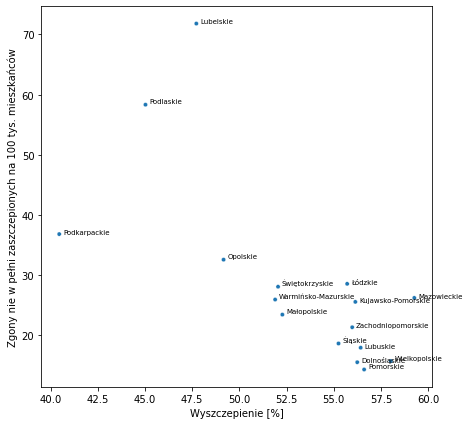

In [27]:

nie = 'Zgony nie w pełni zaszczepionych na 100 tys. mieszkańców'
tak = 'Zgony w pełni zaszczepionych na 100 tys. mieszkańców'
vac = 'Wyszczepienie [%]'

# sns.scatterplot(x=nie, y=vac, data=df);

plt.figure(figsize=(7,7))
scatter_text(vac,nie, 'Województwo',
             data = df, 
             title = '', 
             xlabel = vac,
             ylabel = nie)


/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Wyszczepienie [%]', ylabel='Zgony w pełni zaszczepionych na 100 tys. mieszkańców'>

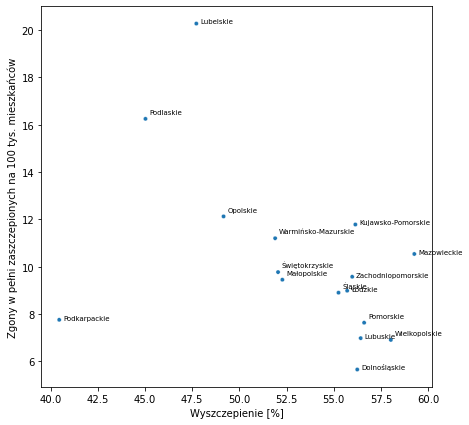

In [28]:
# sns.scatterplot(x=tak, y=vac, data=df);
plt.figure(figsize=(7,7))
scatter_text(vac, tak,  'Województwo',
             data = df, 
             title = '', 
             xlabel = vac,
             ylabel = tak)

/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Zgony nie w pełni zaszczepionych na 100 tys. mieszkańców', ylabel='Zgony w pełni zaszczepionych na 100 tys. mieszkańców'>

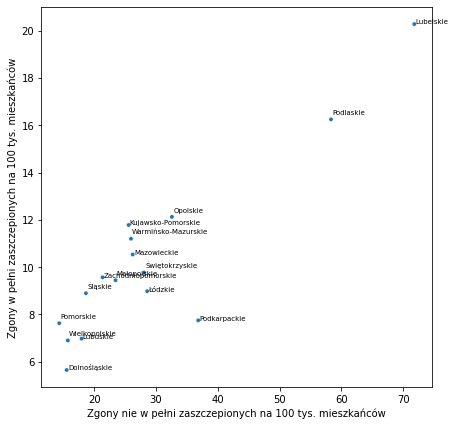

In [29]:
# sns.scatterplot(x=nie, y=tak, data=df);
plt.figure(figsize=(7,7))
scatter_text(nie, tak, 'Województwo',
             data = df, 
             title = '', 
             xlabel = nie,
             ylabel = tak)

In [30]:
pop_dict = pop_woj_df.to_dict()['mieszkańców w województwie']

In [31]:
from_date = datetime.date(2021,7,14)

df = prepare_df1(basiw.dfd, from_date, pop_dict)
plot_df1(from_date, df, basiw.image_dir)